#Numerical regression

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [1]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib


sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [2]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_2_solar_radiation/Vienna_5_radiation.csv', delimiter= " ")
#pd.set_option('display.max_columns', None)
#data.dropna(inplace=True)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OSM_id           1000 non-null   int64  
 1   Building_Height  1000 non-null   int64  
 2   Building_Volume  1000 non-null   float64
 3   Roof_Area        1000 non-null   float64
 4   Radiation        1000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 39.2 KB
None


In [ ]:
#data1=data.drop(data.columns[0, 1,4,17], axis= 1)

In [ ]:
#data1=data.drop([data.columns[0],data.columns[1], 'geometry','building'], axis = 1)

In [ ]:
data.shape

(1000, 5)

In [ ]:
data.head

<bound method NDFrame.head of         OSM_id  Building_Height  Building_Volume    Roof_Area      Radiation
0     12582763                6      3342.458194   255.708130  139627.907331
1     11890773                6     27029.167219  2231.509699  751756.653069
2     11890772                6     10215.515500   793.511448  323936.745008
3     11890771                6      3322.850269   228.418691  129303.991075
4      9351278               30    207514.602615  1554.606785  730533.211155
..         ...              ...              ...          ...            ...
995  953698256                6       692.925044    56.124896   23457.488432
996  953698255                6       690.996233    56.004633   23457.488432
997  953698254                6       689.067423    55.884370   23457.488432
998  953698253                6       687.138613    55.758020   23457.488432
999  953698252                6       711.658390    57.533623   23457.488432

[1000 rows x 5 columns]>

In [4]:
data.columns

Index(['OSM_id', 'Building_Height', 'Building_Volume', 'Roof_Area',
       'Radiation'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OSM_id           1000 non-null   int64  
 1   Building_Height  1000 non-null   int64  
 2   Building_Volume  1000 non-null   float64
 3   Roof_Area        1000 non-null   float64
 4   Radiation        1000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [5]:
for colname, col in data.iteritems():
  print(colname, "min_val", col.min(), "max_val", col.max())

OSM_id min_val 67624 max_val 1062532830
Building_Height min_val 6 max_val 33
Building_Volume min_val 33.828704 max_val 1786300.0
Roof_Area min_val 3.387633 max_val 9380.114249
Radiation min_val 1117.023259 max_val 3624700.0


##Prepare Data

**NORMALIZE INPUTS**

In [6]:
data.columns

Index(['OSM_id', 'Building_Height', 'Building_Volume', 'Roof_Area',
       'Radiation'],
      dtype='object')

In [7]:
data1=data.drop(columns='OSM_id')

In [8]:
data1.columns


Index(['Building_Height', 'Building_Volume', 'Roof_Area', 'Radiation'], dtype='object')

In [9]:
data=data1

In [ ]:
#data=data.dropna()

In [10]:
#same code as last time

#declare features
#X = data.iloc[:,1:-1]
X = data[[ 'Building_Height', 'Building_Volume', 'Roof_Area'  ]]   

# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(1000, 3)


In [11]:
#declare regression target
#y = data.loc[:,"wage_per_hour"].to_numpy()
y = data.loc[:, ['Radiation']].to_numpy()

#y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)
print(y_scaled)


(1000, 1)
[[3.82248413e-02]
 [2.07153978e-01]
 [8.90885413e-02]
 [3.53757506e-02]
 [2.01296946e-01]
 [1.00000000e+00]
 [1.46734068e-01]
 [5.92475180e-01]
 [1.48583657e-01]
 [3.74541713e-01]
 [5.08635510e-01]
 [7.40146698e-01]
 [5.54876728e-02]
 [3.53264431e-01]
 [4.69420181e-01]
 [1.20574188e-01]
 [3.64054855e-01]
 [9.59322030e-01]
 [1.21764615e-01]
 [1.27242540e-01]
 [2.83189615e-02]
 [2.15785394e-03]
 [1.44884479e-02]
 [4.93223758e-03]
 [5.85703213e-03]
 [4.93223758e-03]
 [2.15785394e-03]
 [9.55621031e-03]
 [9.86447516e-03]
 [6.78182667e-03]
 [9.55621031e-03]
 [2.15785394e-03]
 [8.01488607e-03]
 [7.09009152e-03]
 [4.31570788e-03]
 [8.93968062e-03]
 [2.46611879e-03]
 [2.77438364e-03]
 [4.93223758e-03]
 [6.16529698e-03]
 [4.62397273e-03]
 [6.16529698e-03]
 [5.85703213e-03]
 [6.47356183e-03]
 [6.78182667e-03]
 [7.39835637e-03]
 [2.15785394e-03]
 [9.86447516e-03]
 [2.15785394e-03]
 [4.93223758e-03]
 [1.07892697e-02]
 [1.54132424e-03]
 [9.24794547e-04]
 [6.16529698e-03]
 [1.54132424e-03]


**SPLIT INTO TRAIN AND TEST**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [13]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
print(X_test)
print(y_test)

TRAIN input (800, 3) output (800, 1)
TEST input (200, 3) output (200, 1)
[[-0.12795842 -0.0778891  -0.20379012]
 [-0.12795842 -0.07388024 -0.18134093]
 [-0.12795842 -0.07404085 -0.18052366]
 [-0.12795842 -0.06372851 -0.14704355]
 [-0.12795842 -0.07845109 -0.20181763]
 [-0.12795842 -0.07465926 -0.18023919]
 [ 1.3953561  -0.05854967 -0.10839535]
 [-0.12795842 -0.07183983 -0.11942303]
 [-0.12795842 -0.07167222 -0.10441284]
 [-0.12795842 -0.07044126 -0.14942973]
 [-0.12795842 -0.07441482 -0.18486343]
 [-0.12795842 -0.07282883 -0.14214264]
 [-0.12795842 -0.06851675 -0.05027269]
 [-0.12795842 -0.072994   -0.1250789 ]
 [-0.12795842 -0.07464113 -0.15773318]
 [-0.12795842 -0.07313942 -0.16553455]
 [-0.12795842 -0.07820384 -0.20901656]
 [-0.12795842 -0.07582114 -0.14976762]
 [-0.12795842 -0.07411727 -0.16194234]
 [-0.12795842  0.15728532  1.55896579]
 [-0.12795842 -0.06073303 -0.07583942]
 [-0.12795842 -0.07040863 -0.15143326]
 [ 1.3953561  -0.06447343 -0.14967876]
 [-0.12795842 -0.07006363 -0.0

#Build model

From the cheatSheet
Regression between 0 and 1>> 
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [14]:
# Instantiate a sequential model
#tf.seed(5)
#model.save()
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 18 and 12 neurons each
model.add(tf.keras.layers.Dense(3, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(9, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='relu'))
  
# Add a dense layer with 1 value output
#model.add(tf.keras.layers.Dense(1, activation= "linear"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 9)                 36        
                                                                 
 dense_2 (Dense)             (None, 6)                 60        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


#Train model

In [16]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=400, validation_split=0.2)

Epoch 1/400
20/20 [==============================] - 1s 12ms/step - loss: 0.0176 - val_loss: 0.0328
Epoch 2/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.0169
Epoch 3/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0111
Epoch 4/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0101
Epoch 5/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0078
Epoch 6/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0078
Epoch 7/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0081
Epoch 8/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0071
Epoch 9/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 10/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0072
Epoch 11

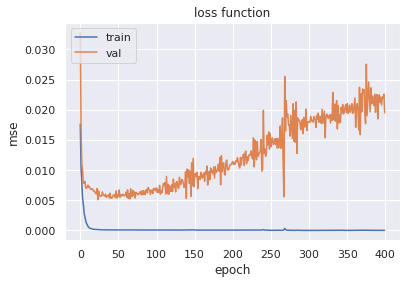

In [17]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [18]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

7/7 [==============================] - 0s 3ms/step - loss: 2.5225e-05
mse_test: 2.522539762139786e-05


#Plot error


In [19]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

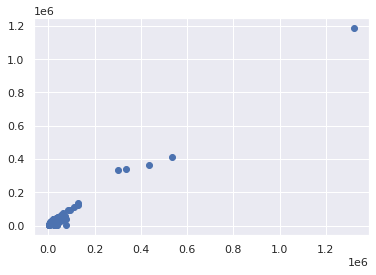

In [20]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)

'Heating-energy-kWh/m2 a', 'Cooling-energy-kWh/m2 a','DHW-energy-kWh/m2 a', 'total-energy-kWh/m2 a'

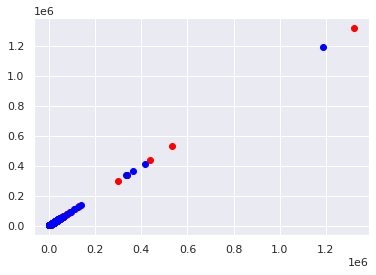

In [21]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)
plt.scatter(y_truth,y_truth, c='red')
plt.scatter(y_pred,y_pred, c='blue')

In [22]:
data1.columns

Index(['Building_Height', 'Building_Volume', 'Roof_Area', 'Radiation'], dtype='object')

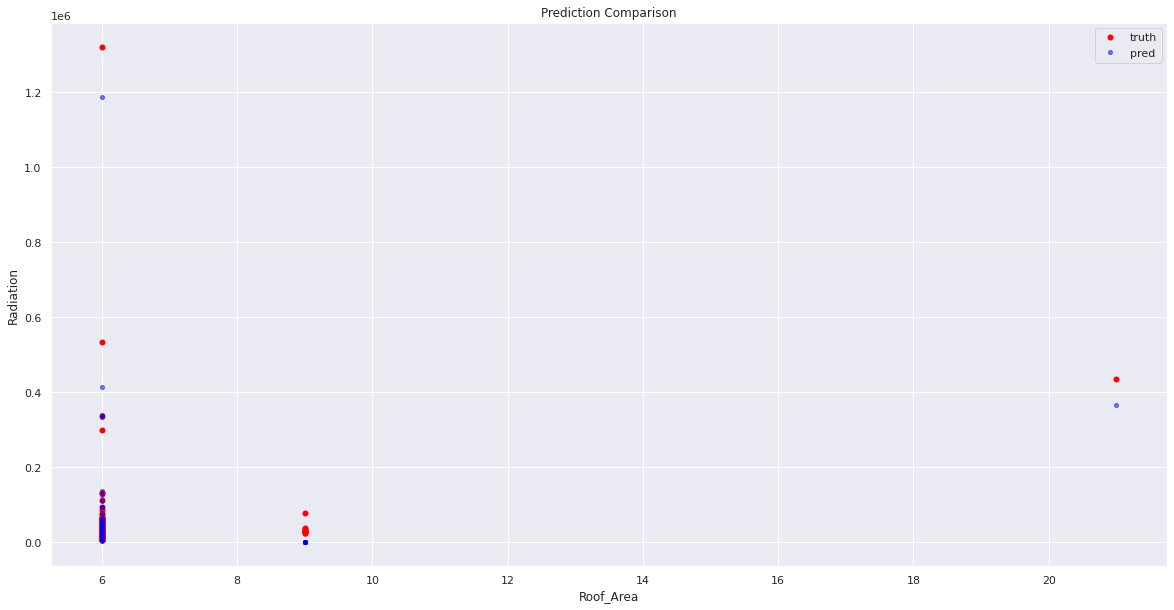

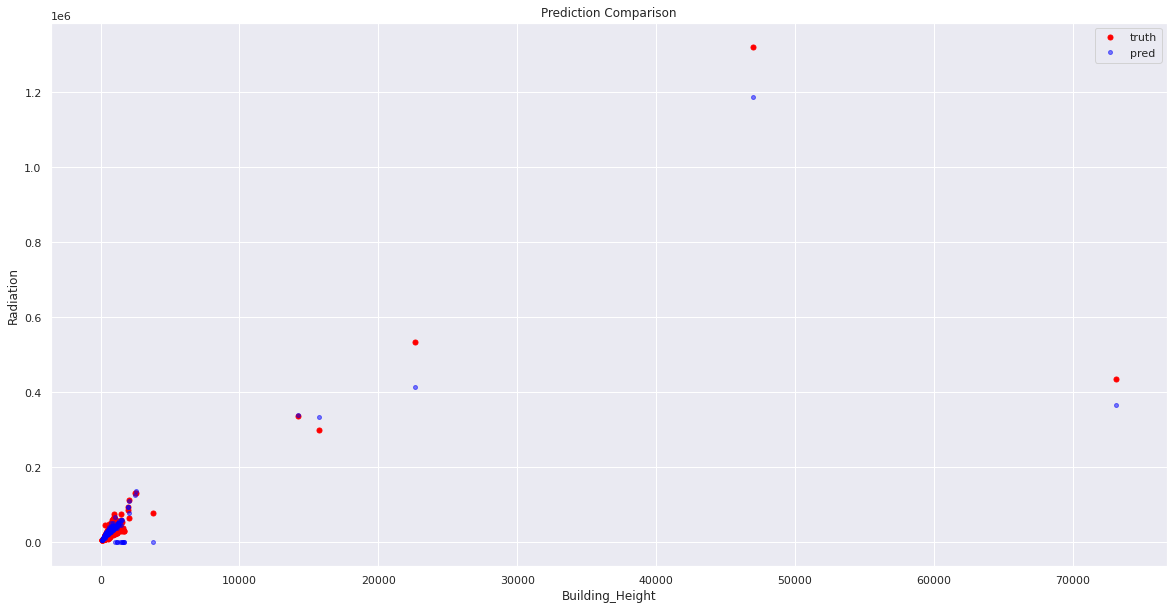

In [23]:
age_test = (scalerX.inverse_transform(X_test)[:,0])

exp_test = (scalerX.inverse_transform(X_test)[:,1])

plot_comparison(age_test, y_pred, y_truth, "Roof_Area", "Radiation")
plot_comparison(exp_test, y_pred, y_truth,  "Building_Height", "Radiation")

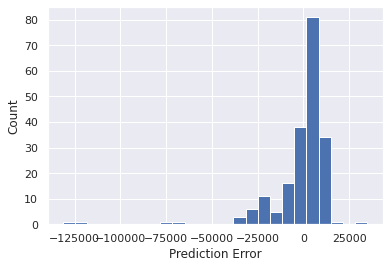

In [24]:
error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

model saving

In [ ]:
#https://www.tensorflow.org/guide/keras/save_and_serialize
model.save("/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_2_solar_radiation/solar_it2.h5")



scalerX_filename = "/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_2_solar_radiation/scalerXAtoB.save"
joblib.dump(scalerX, scalerX_filename)

scalerY_filename = "/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_2_solar_radiation/scalerYAtoB.save"
joblib.dump(scalerY, scalerY_filename)


['/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration_2_solar_radiation/scalerYAtoB.save']

Saving model

In [ ]:
#https://www.tensorflow.org/guide/keras/save_and_serialize
model.save("/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration-2-PCA-ANN-AI_UBREM/ANN-5Dense.h5")



scalerX_filename = "/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration-2-PCA-ANN-AI_UBREM/ANN_5D_scalerXAtoB.save"
joblib.dump(scalerX, scalerX_filename)

scalerY_filename = "/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration-2-PCA-ANN-AI_UBREM/ANN_5D_scalerYAtoB.save"
joblib.dump(scalerY, scalerY_filename)

['/content/gdrive/MyDrive/AIA-IAAC/4-AIA-AI-UBREM/Iteration-2-PCA-ANN-AI_UBREM/ANN_5D_scalerYAtoB.save']